In [8]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# url 잘게 자르기
url = "http://openapi.work.go.kr/opi/opi/opia/wantedApi.do"
serviceKey = "?authKey={AUTHKEY}"
Calltp = "&callTp=L"
Return = "&returnType=XML"
empTpGb = "&empTpGb=1"
Display = "&display=100"
occupation = "&occupation=022|023|024|025|026"

# 항목 parsing 함수작성하기
def parse():
    try:
        COMPANY = wanted.find("company").get_text()
        TITLE = wanted.find("title").get_text()
        SAL_TMNM = wanted.find("salTpNm").get_text()
        SAL = wanted.find("sal").get_text()
        REGION = wanted.find("region").get_text()
        HOLIDAY_TPNM = wanted.find("holidayTpNm").get_text()
        MIN_DEUBG = wanted.find("minEdubg").get_text()
        CAREER = wanted.find("career").get_text()
        regDt = wanted.find("regDt").get_text()
        jobsCd = wanted.find("jobsCd").get_text()
        return {
            "회사명": COMPANY,
            "체용제목": TITLE,
            "임금형태": SAL_TMNM,
            "급여": SAL,
            "근무지역": REGION,
            "근무형태": HOLIDAY_TPNM,
            "최소학력": MIN_DEUBG,
            "경력": CAREER,
            "등록일자": regDt,
            "직종코드": jobsCd
        }
    except AttributeError as e:
        return {
            "회사명": None,
            "체용제목": None,
            "임금형태": None,
            "급여": None,
            "근무지역": None,
            "근무형태": None,
            "최소학력": None,
            "경력": None,
            "직종코드": None,
            "우대조건": None
        }


# parsing 하기
for pageNum in range (1, 1000):
  StartPage = "&startPage=" + str(pageNum)
  result = requests.get(url + serviceKey + Calltp + Return + StartPage + occupation + empTpGb + Display)
  soup = BeautifulSoup(result.text, 'lxml-xml')
  wanteds = soup.find_all("wanted")

  row = []
  for wanted in wanteds:
      row.append(parse())

  # pandas 데이터프레임에 넣기
  df = pd.DataFrame(row)

  df.to_csv(str(pageNum)+".csv", mode='w', encoding='utf-8')

In [5]:
import os

path = "./"
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

print ("file_list_csv: {}".format(file_list_csv))

df_all = pd.DataFrame()
for i in range(0,len(file_list_csv)):
    if file_list_csv[i].split('.')[1] == 'csv':
        file = file_list_csv[i]
        df= pd.read_csv(file,encoding='utf-8') 
        df_all = pd.concat([df_all, df])

df_all
df_all.to_csv("20221130.csv",mode='w',encoding='utf-8')

file_list_csv: ['1.csv']


In [3]:
import pandas as pd
df_all = pd.read_csv("/content/20221130.csv", encoding='utf-8')
df_all.sort_values('등록일자')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,회사명,체용제목,임금형태,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
89931,12631,99,99,(주)코리안푸드+,맛있는 먹거리 온라인쇼핑몰 운영 담당 채용,연봉,2304만원 ~ 2500만원,서울 강남구,주5일근무,학력무관,관계없음,22-09-30,615300.0
88122,10822,90,90,주식회사에너넷,(주)에너넷 북부사업부 도시가스 행복매니저 모집[...,연봉,2806만원,대전 유성구,주5일근무,학력무관,관계없음,22-09-30,613001.0
88121,10821,89,89,(주)필식자재마트,공산품 진열 및 관리직원,월급,270만원 ~ 270만원,대전 서구,주6일근무,학력무관,관계없음,22-09-30,617901.0
88120,10820,88,88,매그이엔티,"행사 기획, 운영",월급,200만원 ~ 250만원,서울 마포구,주5일근무,학력무관,관계없음,22-09-30,24401.0
88119,10819,87,87,농업회사법인(주)청정미트,가족처럼 일할분 구합니다,연봉,3240만원,광주 광산구,주6일근무,학력무관,관계없음,22-09-30,872102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64088,10588,88,88,백상코퍼레이션(주),[전기기사/영등포] KB국민은행 본관 (주야비),월급,229만원 ~ 229만원,서울 영등포구,주5일근무,학력무관,경력,22-11-29,834002.0
64089,10589,89,89,부산연제지역자활센터,2022년 지역자활센터 희망키움통장 사례관리자 채...,월급,228만원 ~ 234만원,부산 연제구,주5일근무,학력무관,관계없음,22-11-29,231101.0
64090,10590,90,90,주식회사 케이엠디,금형설계 직원을 공개채용합니다.,연봉,4500만원 ~ 5600만원,경기 부천시,주6일근무,학력무관,경력,22-11-29,813104.0
64092,10592,92,92,(주)창대정밀,금형 구매공정,연봉,2600만원 ~ 3500만원,경기 화성시,주5일근무,학력무관,경력,22-11-29,28302.0


In [4]:
df_all = pd.read_csv("/content/20221130.csv")
df_all.sort_values('등록일자')

df_year_cost = df_all[df_all.임금형태 == '연봉']
df_month_cost = df_all[df_all.임금형태 == '월급']


def convertMonthCost(x):
  if x.__contains__("~"):
    return rangeCost(x)
  else:
    return convertFixMonthCost(x)

def rangeCost(x):
  x = x.replace('만원', '')
  x = x.replace(' ', '')

  costs = x.split('~')
  
  minMonthCost = costs[0]
  maxMonthCost = costs[1]
  minYearCost = int(minMonthCost) * 12
  maxYearCost = int(maxMonthCost) * 12
  
  return int((minYearCost + maxYearCost) / 2)

def convertFixMonthCost(x):
    x = x.replace('만원', '')
    return int(x) * 12

def removePostfix(x):
  if x.__contains__('~'):
    return getAvg(x)
  return int(x.replace('만원',''))

def getAvg(x):
  x = x.replace('만원', '')
  x = x.replace(' ', '')
  split = x.split('~')

  return int(int(split[0]) + int(split[1]) / 2)

df_year_cost.급여 = df_year_cost.급여.apply(removePostfix)
df_month_cost.급여 = df_month_cost.급여.apply(convertMonthCost)
df_all = pd.concat((df_year_cost,df_month_cost), sort=False)

df_all.drop(['Unnamed: 0', 
             'Unnamed: 0.1', 
             'Unnamed: 0.1.1',
             '임금형태'], 
            axis=1, 
            inplace=True)

df_all

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,회사명,체용제목,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드
2,(주)모던텍,전기차 충전기 품질관리 신입 /경력자 모집,5300,경남 창원시 의창구,주5일근무,대졸(2~3년),관계없음,22-10-20,28402.0
3,서울탑치과,서울탑치과에서 성실한 코디네이터를 기다립니다.(인...,2292,울산 남구,주5일근무,학력무관,경력,22-10-20,29210.0
7,쿠팡 주식회사,[쿠팡] 지게차 대규모 채용,4600,충남 아산시,주5일근무,학력무관,관계없음,22-10-20,623004.0
8,(주)템텍,테프론 열교환기 생산원모집,5000,경기 김포시,주5일근무,학력무관,관계없음,22-10-20,826900.0
9,(주)템텍,범용 선반 조작원 모집,5000,경기 김포시,주5일근무,학력무관,경력,22-10-20,813202.0
...,...,...,...,...,...,...,...,...,...
94223,아름다운아침아파트 입주자대표회의,시설기사 모집,3024,강원 동해시,주5일근무,학력무관,관계없음,22-10-17,542004.0
94224,신국제레미콘주식회사,레미콘 품질직원 모집합니다.,3000,경북 경주시,주6일근무,학력무관,관계없음,22-10-17,140700.0
94225,신국제레미콘주식회사,레미콘 영업관리사원 모집,3000,경북 경주시,주6일근무,학력무관,관계없음,22-10-17,26103.0
94229,엠스타일,미싱사 오바사 시다보조 구합니다,2646,서울 성북구,주5일근무,학력무관,신입,22-10-17,862301.0


In [4]:
import numpy as np

workCode = pd.read_csv('/content/직종코드.csv')
workCode = workCode.replace(r'^\s*$', np.nan, regex=True)
workCode.dropna(thresh = 2, inplace=True)
workCode.fillna(method='ffill', inplace=True)

workCode.to_csv("new_직종코드.csv", mode='w', encoding='utf-8')

In [5]:
workCode = pd.read_csv('/content/new_직종코드.csv', header=1)

# 불필요한 열 삭제
workCode.drop(['0'], axis =1 , inplace=True)

# 채용 공고와 병합을 위한 columns 이름 변경
workCode.columns = ['직종코드', '대분류', '중분류', '소분류']

workCode

,직종코드,대분류,중분류,소분류
0,11100,경영·사무·금융·보험,행정·경영·금융·보험 관리직,의회의원·고위공무원 및 공공단체임원
1,11200,경영·사무·금융·보험,행정·경영·금융·보험 관리직,기업 고위임원
2,12100,경영·사무·금융·보험,행정·경영·금융·보험 관리직,정부행정 관리자
3,12200,경영·사무·금융·보험,행정·경영·금융·보험 관리직,경영지원 관리자
4,12201,경영·사무·금융·보험,행정·경영·금융·보험 관리직,경영기획 부서장
...,...,...,...,...
1167,904200,농림어업직,어업 종사자,어부 및 해녀
1168,905000,농림어업직,농림어업 단순 종사자,농림어업 단순 종사원
1169,905001,농림어업직,농림어업 단순 종사자,농업 단순 종사원
1170,905002,농림어업직,농림어업 단순 종사자,"임업 단순 종사원(산림보호감시, 산불감시원 등)"


In [6]:
#채용 공고와 직종코드 정보 합치기
merged = pd.merge(left = df_all, right = workCode, how = 'inner', on = '직종코드')

merged

,회사명,체용제목,급여,근무지역,근무형태,최소학력,경력,등록일자,직종코드,대분류,중분류,소분류
0,(주)모던텍,전기차 충전기 품질관리 신입 /경력자 모집,5300,경남 창원시 의창구,주5일근무,대졸(2~3년),관계없음,22-10-20,28402.0,경영·사무·금융·보험,무역·운송·자재·구매·생산·품질 사무,생산·품질 사무원 및 관리원(기계·자동차·금속)
1,(주)성신앤큐,품질관리 채용,5200,대구 달성군,주5일근무,학력무관,관계없음,22-10-20,28402.0,경영·사무·금융·보험,무역·운송·자재·구매·생산·품질 사무,생산·품질 사무원 및 관리원(기계·자동차·금속)
2,(주)부성엘티에스,품질관리부 경력 및 신입 사원 모집,3000,경기 화성시,주5일근무,학력무관,경력,22-10-20,28402.0,경영·사무·금융·보험,무역·운송·자재·구매·생산·품질 사무,생산·품질 사무원 및 관리원(기계·자동차·금속)
3,(주)티티에스,"티티에스 화성사업장 QA그룹 검사, 성적서,기준서...",5400,경기 화성시,주5일근무,중졸,관계없음,22-10-20,28402.0,경영·사무·금융·보험,무역·운송·자재·구매·생산·품질 사무,생산·품질 사무원 및 관리원(기계·자동차·금속)
4,우주기전(주),자동차부품(shaft)품질담당자 모집,5000,경남 창원시 의창구,주5일근무,대졸(2~3년),경력,22-11-18,28402.0,경영·사무·금융·보험,무역·운송·자재·구매·생산·품질 사무,생산·품질 사무원 및 관리원(기계·자동차·금속)
...,...,...,...,...,...,...,...,...,...,...,...,...
86332,(주)국보자판기상사,자동판매기 운영 관리 직원 모집,3000,경남 창원시 성산구,주5일근무,고졸,관계없음,22-10-19,562200.0,미용·여행·숙박·음식·경비·돌봄·청소,검침·주차관리 및 기타 단순 서비스,자동판매기 관리원
86333,(주)휴넥트,JOB 페스티벌 10.6(목) 참가] 고객상담 모...,3000,부산 연제구,주5일근무,고졸,관계없음,22-10-05,29207.0,경영·사무·금융·보험,안내·접수·고객상담 사무,고객 상담원(백화점·마트)
86334,(주)렛츠고여행사,여행사 직원모집,2400,광주 남구,주5일근무,학력무관,관계없음,22-10-12,521302.0,미용·여행·숙박·음식·경비·돌봄·청소,여행·객실승무·숙박·오락 서비스,여행 안내원
86335,프로펫평생교육원,함께할 반려동물 미용강사(실장님) 을 구인 합니다...,3000,경기 안산시 상록구,주5일근무,고졸,관계없음,22-10-18,511501.0,미용·여행·숙박·음식·경비·돌봄·청소,미용 및 반려동물 미용·관리,반려동물 미용사


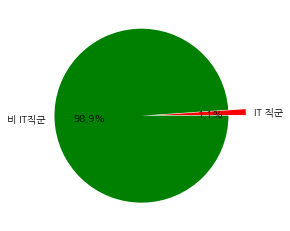

In [7]:
import matplotlib.pyplot as plt

ITCount = merged[merged['대분류'] == '연구/IT'].대분류.count()
NoneITCount = merged[merged['대분류'] != '연구/IT'].대분류.count()

ratio = [ITCount, NoneITCount]
labels = ['IT 직군', '비 IT직군']
explode = [0, 0.2]
plt.pie(ratio, labels = labels,explode=explode, autopct = '%.1f%%',colors = ['red','green'])
plt.show()

In [8]:
IT_df = merged[merged['대분류'] == '연구/IT']

IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서귀포시' if '서귀포시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'제주시' if '제주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'합천군' if '합천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'거창군' if '거창군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'함양군' if '함양군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'산청군' if '산청군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'하동군' if '하동군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남해군' if '남해군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고성군' if '고성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'창녕군' if '창녕군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'함안군' if '함안군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'의령군' if '의령군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'창원시진해구' if '창원시 진해구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'창원시마산회원구' if '창원시 마산회원구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'창원시마산합포구' if '창원시 마산합포구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'창원시성산구' if '경남 창원시 성산구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'창원시의창구' if '창원시 의창구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'양산시' if '양산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'거제시' if '거제시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'밀양시' if '밀양시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'김해시' if '김해시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'사천시' if '사천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'통영시' if '통영시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'진주시' if '진주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'울릉군' if '울릉군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'울진군' if '울진군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'봉화군' if '봉화군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'예천군' if '예천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'칠곡군' if '칠곡군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'성주군' if '성주군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고령군' if '고령군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'청도군' if '청도군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영덕군' if '영덕군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영양군' if '영양군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'청송군' if '청송군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'의성군' if '의성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'군위군' if '군위군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'경산시' if '경산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'문경시' if '문경시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'상주시' if '상주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영천시' if '영천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영주시' if '영주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'구미시' if '구미시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'안동시' if '안동시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'김천시' if '김천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'경주시' if '경주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'포항시북구' if '포항시 북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'포항시남구' if '포항시 남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'신안군' if '신안군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'진도군' if '진도군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'완도군' if '완도군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'장성군' if '장성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영광군' if '영광군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'함평군' if '함평군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'무안군' if '무안군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영암군' if '영암군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'해남군' if '해남군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강진군' if '강진군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'장흥군' if '장흥군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'화순군' if '화순군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'보성군' if '보성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고흥군' if '고흥군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'구례군' if '구례군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'곡성군' if '곡성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'담양군' if '담양군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'광양시' if '광양시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'나주시' if '나주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'순천시' if '순천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'여수시' if '여수시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'목포시' if '목포시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부안군' if '부안군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고창군' if '고창군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'순창군' if '순창군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'임실군' if '임실군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'장수군' if '장수군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'무주군' if '무주군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'진안군' if '진안군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'완주군' if '완주군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'김제시' if '김제시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남원시' if '남원시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'정읍시' if '정읍시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'익산시' if '익산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'군산시' if '군산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'전주시덕진구' if '전주시 덕진구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'전주시완산구' if '전주시 완산구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'태안군' if '태안군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'예산군' if '예산군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'홍성군' if '홍성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'청양군' if '청양군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서천군' if '서천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부여군' if '부여군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'금산군' if '금산군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'당진시' if '당진시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'계룡시' if '계룡시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'논산시' if '논산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서산시' if '서산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'아산시' if '아산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'보령시' if '보령시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'공주시' if '공주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'천안시서북구' if '천안시 서북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'천안시동남구' if '천안시 동남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'증평군' if '증평군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'단양군' if '단양군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'음성군' if '음성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'괴산군' if '괴산군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'진천군' if '진천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영동군' if '영동군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'옥천군' if '옥천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'보은군' if '보은군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'청원군' if '청원군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'제천시' if '제천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'충주시' if '충주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'청주시흥덕구' if '청주시 흥덕구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'청주시상당구' if '청주시 상당구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'양양군' if '양양군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고성군' if '고성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'인제군' if '인제군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'양구군' if '양구군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'화천군' if '화천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'철원군' if '철원군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'정선군' if '정선군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'평창군' if '평창군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영월군' if '영월군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'횡성군' if '횡성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'홍천군' if '홍천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'삼척시' if '삼척시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'속초시' if '속초시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'태백시' if '태백시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동해시' if '동해시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강릉시' if '강릉시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'원주시' if '원주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'춘천시' if '춘천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'양평군' if '양평군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'가평군' if '가평군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'연천군' if '연천군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'여주시' if '여주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'포천시' if '포천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'양주시' if '양주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'광주시' if '광주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'화성시' if '화성시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'김포시' if '김포시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'안성시' if '안성시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'이천시' if '이천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'파주시' if '파주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'용인시수지구' if '용인시 수지구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'용인시기흥구' if '용인시 기흥구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'용인시처인구' if '용인시 처인구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'하남시' if '하남시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'의왕시' if '의왕시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'군포시' if '군포시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'시흥시' if '시흥시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'오산시' if '오산시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남양주시' if '남양주시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'구리시' if '구리시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'과천시' if '과천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고양시일산서구' if '고양시 일산서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고양시일산동구' if '고양시 일산동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'고양시덕양구' if '고양시 덕양구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'안산시단원구' if '안산시 단원구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'안산시상록구' if '안산시 상록구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동두천시' if '동두천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'평택시' if '평택시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'광명시' if '광명시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부천시' if '부천시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부천시오정구' if '부천시 오정구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부천시소사구' if '부천시 소사구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부천시원미구' if '부천시 원미구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'안양시동안구' if '안양시 동안구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'안양시만안구' if '안양시 만안구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'의정부시' if '의정부시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'성남시분당구' if '성남시 분당구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'성남시중원구' if '성남시 중원구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'성남시수정구' if '성남시 수정구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'수원시영통구' if '수원시 영통구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'수원시팔달구' if '수원시 팔달구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'수원시권선구' if '수원시 권선구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'수원시장안구' if '수원시 장안구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'세종시' if '세종시' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'울주군' if '울주군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'북구' if '북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동구' if '동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남구' if '남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중구' if '중구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'대덕구' if '대덕구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'유성구' if '유성구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서구' if '서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중구' if '중구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동구' if '동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'광산구' if '광산구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'북구' if '북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남구' if '남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서구' if '서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동구' if '동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'옹진군' if '옹진군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강화군' if '강화군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서구' if '서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'계양구' if '계양구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부평구' if '부평구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남동구' if '남동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'연수구' if '연수구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남구' if '남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동구' if '동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중구' if '중구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'달성군' if '달성군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'달서구' if '달서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'수성구' if '수성구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'북구' if '북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남구' if '남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서구' if '서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동구' if '동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중구' if '중구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'기장군' if '기장군' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'사상구' if '사상구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'수영구' if '수영구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'연제구' if '연제구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강서구' if '강서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'금정구' if '금정구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'사하구' if '사하구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'해운대구' if '해운대구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'북구' if '북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'남구' if '남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동래구' if '동래구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'부산진구' if '부산진구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영도구' if '영도구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동구' if '동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서구' if '서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중구' if '중구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강동구' if '강동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'송파구' if '송파구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강남구' if '강남구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서초구' if '서초구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'관악구' if '관악구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동작구' if '동작구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'영등포구' if '영등포구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'금천구' if '금천구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'구로구' if '구로구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강서구' if '강서구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'양천구' if '양천구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'마포구' if '마포구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'서대문구' if '서대문구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'은평구' if '은평구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'노원구' if '노원구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'도봉구' if '도봉구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'강북구' if '강북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'성북구' if '성북구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중랑구' if '중랑구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'동대문구' if '동대문구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'광진구' if '광진구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'성동구' if '성동구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'용산구' if '용산구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'중구' if '중구' in x else x)
IT_df.근무지역 = IT_df.근무지역.apply(lambda x:'종로구' if '종로구' in x else x)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
import folium
import json

# 전국 경계 정보를 가진 geo-json 파일 불러오기
k_geo = '/content/skorea_municipalities_geo_simple.json'


# 전국 지도 만들기
k_map = folium.Map(location=[36.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=7)

list(IT_df['근무지역'].value_counts().quantile([0, 0.25, 0.5, 0.75, 1]))
# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=k_geo,    # 지도 경계
                 data = IT_df['근무지역'].value_counts(),      # 표시하려는 데이터
                 columns = ['지역명','개수'],  # 열 지정
                 fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.3,
                 bins = list(IT_df['근무지역'].value_counts().quantile([0.1, 0.15,0.2, 0.25,0.3, 0.35,0.4, 0.45, 0.5,0.6, 0.65,0.7, 0.75,0.8, 0.85,0.9, 0.9, 1])),               
                 key_on='feature.properties.name',
                 ).add_to(k_map)

k_map

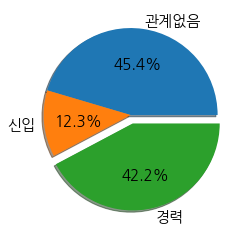

In [10]:
# 경력별 퍼센트 구하기
none = IT_df[IT_df.경력 == '관계없음'].경력.count()
newcomer = IT_df[IT_df.경력 == '신입'].경력.count()
career = IT_df[IT_df.경력 == '경력'].경력.count()

ratio = [none, newcomer, career]
labels = ['관계없음', '신입', '경력']
explode = [0, 0, 0.1]
plt.pie(ratio, labels=labels, shadow=True,explode=explode,autopct='%.1f%%',textprops={'fontsize': 15})

plt.show()

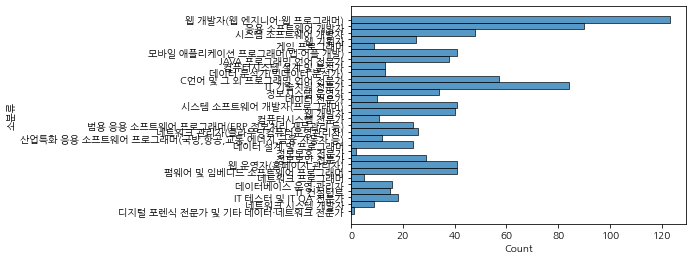

In [11]:
import seaborn as sns
sns.histplot(data=IT_df,y='소분류')

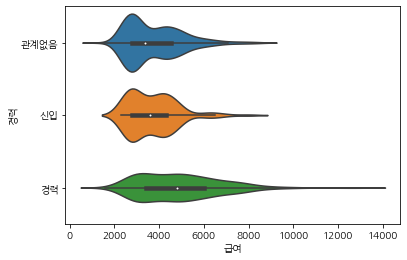

In [12]:
sns.violinplot(data=IT_df,y = '경력', x = '급여')

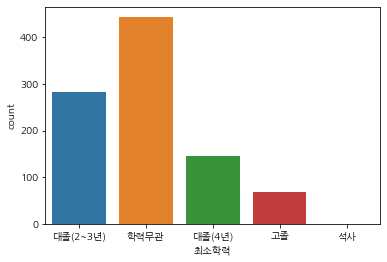

In [13]:
sns.countplot(data=IT_df,x = '최소학력')

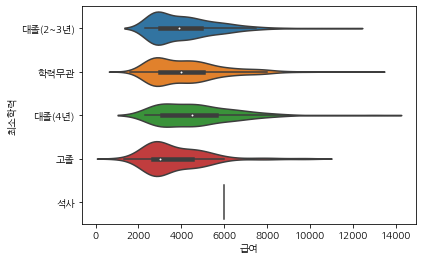

In [14]:
sns.violinplot(data=IT_df,y = '최소학력', x = '급여')